In [1]:
%matplotlib nbagg
# %matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')
from figFcns import *
from kyvadlo_simSch import *

# Meranie frekvenčných charakteristík


## Úlohy v rámci predmetu UKYB

###### Hlavná úloha:

Odmerajte vybrané body frekvenčnej charakteristiky predmetného systému v dvoch pracovných bodoch.

###### Úloha pre záujemcov:

Porovnajte namerané hodnoty frekvenčnej charakteristiky s prislúchajúcou frekvenčnou charakteristikou modelu predmetného systému.

<hr>

Východiská a odporúčaný postup: 

K dispozícii sú modely predmetného systému identifikované v rôznych pracovných bodoch daných prevodovou charakteristikou.

Pre ďalšiu prácu sa uvažuje len jedna prevodová charakteristika (jedna z tých, ktoré sú k dispozícii). Tejto samozrejme zodpovedajú pracovné podmienky a nastavenie predmetného systému.

Z predchádzajúcej práce sú na prevodovej charakteristike zvolené pracovné body. V pracovnom bode bol identifikovaný model reálneho systému.

Model možno využiť pre odhad skutočnej frekvenčnej charakteristiky systému (v danom pracovnom bode). Na základe tohto odhadu je možné zvoliť frekvencie, ktoré sú v istom zmysle významné, a pre ktoré sa budú merať body frekvenčnej charakteristiky v zmysle hlavnej úlohy zadania.

Ak je modelom dynamický systém prvého rádu, potom významnou je frekvencia daná (jedinou) časovou konštantou modelu. Ďalšími zaujímavými frekvenciámi sú potom o niečo nižšia frekvencia a o niečo vššia frekvencia. Tieto tri uvedené frekvencie určujú body frekvenčnej charakteristiky, ktoré sú predmetom merania v rámci predmetu UKYB.

<hr>

### Stručné vysvetlenie pojmov



Ak na vstup systému privedieme harmonický signál s danou frekvenciou a s amplitúdou, ktorej veľkosť má zmysel považovať za jednotkovú, tak na výstupe systému, po prechodových dejoch, pozorujeme periodický signál s rovnakou frekvenciou ako frekvencia vstupného signálu.

Ak má zmysel uvažovať tzv. frekvenčné vlastnosti (nazvime ich tak) systému, potom je uvedený signál na výstupe možné považovať za blízky harmonickému a teda je možné určiť jeho ampltúdu a tiež je možné určiť jeho fázu v danom časovom okamihu (principiálne tak ako je možné jednoznačne určiť fázu harmonického signálu).

Pomer amplitúd vstupného a výstupného signálu, a posun (časový) medzi vzájomne zodpovedajúcimi fázami vstupného a výstupného signálu, tieto dve hodnoty (veličiny) charakterizujú systém vzhľadom na danú frekvenciu (danú frekvenciu vstupného harmnického (!) signálu).

Prirodzene, uvedené sa vzťahuje na pracovný bod systému a jeho okolie, v ktorom sú vlastnosti systému (vo všeobecnosti) relatívne nemenné. Jednotková amplitúda vstupného signálu teda nespôsobí to, že výstup systému by nebol v okolí pracovného bodu.

Frekvenčná charakteristika znázorňuje frekvenčné vlastnosti systému pre dané frekvenčné pásmo (interval frekvencií).

Ako bolo uvedené, sú dve vlastnosti (frekvenčné), amplitúdový pomer a fázový posun.

Používajú sa dva spôsoby znázornenia frekvenčnej charakteristiky, ktoré sa nazývajú Bode-ho krivky (charakteristiky, závislosti) a Nyquist-ova krivka (charakteristika). V prípade Bode-ho charakteristík ide o samostatné znázornenie závislosti amplitúdového pomeru na frekvencii a fázového posunu na frekvencii. Nyquist-ova krivka sa znázorňuje v komplexnej rovine pričom jeden bod krivky zodpovedá jednej frekvencii. Vektor daný bodom Nyquist-ovej krivky nesie informáciu o oboch frekvenčných vlastnostiach systému, o aplitúdovom pomere (dĺžka vektora) a fázovom posune (uhol vektora), pre danú frekvenciu.

## O meraní prechodovej charakteristiky

Na rozdiel od práce v rámci predmetu UKYB sa v nasledujúcom, pre ilustráciu merania prechodovej charakteristiky, používa simulovaný systém - kyvadlo (tak ako v predchádzajúcich témach).

V ďalšom budeme používať Bode-ho charakteristiky ako spôsob znázornenia frekvenčnej charakteristiky systému v okolí daného pracovného bodu.

V nasledujúcom bude vsetko ilustrované len pre jeden pracovný bod - pre prípadné iné pracovné body je samozrejme možné použiť tie isté postupy.

#### Info. o pracovnom bode


Vlastnosti a charakteristiky systému, ktoré sú predmetom nášho záujmu súvisia s pracovným bodom a jeho okolím. Nech pracovným bodom je nasledovný bod (o ktorom je z predchádzajúceho už mnoho známe).

1.PB: $u_{PB1} = 4$ [kg m$^2$ s$^{-2}$] 

Na základe nameraných bodov prevodovej charakteristiky možno k zvolenej ustálenej vstupnej hodnote priradiť výstupnú hodnotu $y = 24,2$ [°]. Pracujme však s aproximáciou prevodovej charakteristiky, teda s jej modelom. Pre $u = 4$ [kg m$^2$ s$^{-2}$] podľa modelu prevodovej charakteristiky prislúcha hodnota ustáleného výstupu:

In [4]:
# namerana prevodova charakteristika:
prevodChar = np.loadtxt('misc/dataRepo/prevodChar.csv')

# model prevodovej charakteristiky:
H = np.hstack([
            np.ones([prevodChar[:,0].shape[0],1]),
            prevodChar[:,0].reshape(-1,1),
            (prevodChar[:,0].reshape(-1,1))**2,
            (prevodChar[:,0].reshape(-1,1))**3,
            ])

y = prevodChar[:,1].reshape(-1,1)

theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(H.T, H)), H.T), y)

u_custom = np.arange(0,9.81,0.1).reshape(-1,1)

y_model = np.zeros(u_custom.shape)
for idx in range(u_custom.shape[0]):
    for power in range(H.shape[1]):
        y_model[idx,0] = y_model[idx,0] + (u_custom[idx,0]**power) * theta[power]
        
u_PB1 = 4.0
y_PB1 = theta[0,0] + theta[1,0] * u_PB1 + theta[2,0] * u_PB1**2 + theta[3,0] * u_PB1**3
print u'y_PB1 = {:6.2f} [°]'.format(y_PB1)        

y_PB1 =  23.70 [°]


Pre 1. pracovný bod (PB1) bolo zvolené okolie $u = 4 \pm 0,8$ [kg m$^2$ s$^{-2}$].

In [5]:
u_PB1_okol = 0.8

y_PB1_h = theta[0,0] + theta[1,0] * (u_PB1+u_PB1_okol) + theta[2,0] * (u_PB1+u_PB1_okol)**2 + theta[3,0] * (u_PB1+u_PB1_okol)**3
y_PB1_l = theta[0,0] + theta[1,0] * (u_PB1-u_PB1_okol) + theta[2,0] * (u_PB1-u_PB1_okol)**2 + theta[3,0] * (u_PB1-u_PB1_okol)**3

<IPython.core.display.Javascript object>


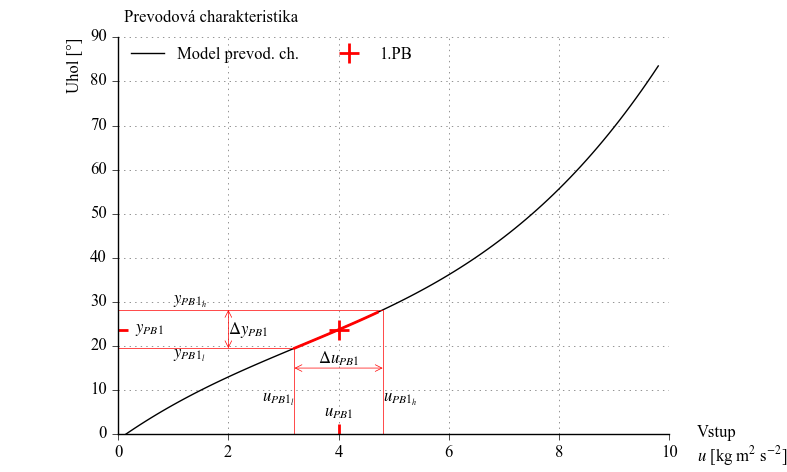

In [6]:
fig = plt.figure(0, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)


ax0.set_title(u'Prevodová charakteristika', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')
ax0.set_xlabel(u'Vstup\n$u$ [kg m$^2$ s$^{-2}$]', x=1.05, ha='left', va='bottom')

ax0.set_ylim([0, 90])

ax0.plot(u_custom, y_model,
         '-k', ms=3,
         label=u'Model prevod. ch.',
         )

ax0.plot(u_PB1, y_PB1,
         '+', ms=15, mew=2, mec='red',
         label=u'1.PB'
         )

ax0.plot([u_PB1-u_PB1_okol, u_PB1-u_PB1_okol, 0], [0, y_PB1_l, y_PB1_l],
         '-', color='r', lw=0.5,
         )
ax0.plot([u_PB1+u_PB1_okol, u_PB1+u_PB1_okol, 0], [0, y_PB1_h, y_PB1_h],
         '-', color='r', lw=0.5,
         )

temp_Mask_PB1 = np.logical_and((u_custom >= u_PB1-u_PB1_okol), (u_custom <= u_PB1+u_PB1_okol))
ax0.plot(u_custom[temp_Mask_PB1], y_model[temp_Mask_PB1],
         '-r', ms=4, lw=2,
         )

fcnDefaultLayoutAdj(fig, 0.15, 0.4, 0.92, 0.08)

#-------------
#Doplnujuce info v obr:

#--------
ax0.plot(u_PB1, 0,
         '|', ms=15, mew=2, mec='r',
         )
ax0.text(u_PB1, 3,
         u'$u_{PB1}$',
         ha='center', va='bottom',
        )
ax0.text(u_PB1 - u_PB1_okol, 6,
         u'$u_{PB1_l}$',
         ha='right', va='bottom',
        )
ax0.text(u_PB1 + u_PB1_okol, 6,
         u'$u_{PB1_h}$',
         ha='left', va='bottom',
        )
ax0.annotate(s='', xy=(u_PB1 - u_PB1_okol,15), xytext=(u_PB1 + u_PB1_okol,15), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5)
            )
ax0.text(u_PB1, 15,
         u'$\Delta u_{PB1}$',
         ha='center', va='bottom',
        )

ax0.plot(0, y_PB1,
         '_', ms=15, mew=2, mec='r',
         )
ax0.text(0.3, y_PB1,
         u'$y_{PB1}$',
         ha='left', va='center',
        )
ax0.text(1, y_PB1_l,
         u'$y_{PB1_l}$',
         ha='left', va='top',
        )
ax0.text(1, y_PB1_h,
         u'$y_{PB1_h}$',
         ha='left', va='bottom',
        )
ax0.annotate(s='', xy=(2,y_PB1_l), xytext=(2,y_PB1_h), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5)
            )
ax0.text(2, y_PB1,
         u'$\Delta y_{PB1}$',
         ha='left', va='center',
        )

#--------
handles_ax0, labels_ax0 = ax0.get_legend_handles_labels()
ax0.legend(handles_ax0, labels_ax0,
           loc=2, bbox_to_anchor=(0.02, 0.98), ncol=3,
           )
#----------------------------------------------  

### O získaní frekvenčnej charakteristiky lineárnych dynamických systémov

V uvedenenom pracovnom bode bol identifikovaný model reálneho systému, ktorým je dynamický systém prvého rádu definovaný prenosovou funkciou. Konkrétne:

$$
\frac{y(s)}{u(s)} = \frac{K}{T s + 1}
$$

Táto prenosová funkcia je obrazom dynamického systému daného diferencialnou rovnicou v tvare

$$
\begin{align*}
    T \dot y(t) &= - y(t) + K u(t) \\
    \dot y(t) &= - \left( \frac{1}{T} \right) y(t) + \left( \frac{K}{T} \right) u(t)
\end{align*}    
$$

Je zrejmé, že výstupnou veličinou je signál $y(t)$. Tento ma svoje jednotky (fyzikálny rozmer). Napríklad, nech sú to Volty [V] (ale môže to byť čokoľvek!). Ľavá strana rovnice
$$
\begin{align*}
    \dot y(t) &= - \left( \frac{1}{T} \right) y(t) + \left( \frac{K}{T} \right) u(t)
\end{align*}    
$$
má teda jednotky [V/s] (volty za sekundu) (nech je časovou jednotkou sekunda). Keďže ide o rovnicu, členy na pravej strane musia mať rovnaké jednotky ako pravá strana rovnice. Člen $ -\left( \frac{1}{T} \right) y(t)$ má jednotky [V/s] pretože signál $y(t)$ je vo voltoch a časová konštanta $T$ je v sekundách [s]. Člen $\left( \frac{K}{T} \right) u(t)$ musí mať tiež rozmer [V/s].

Parameter $T$ má jednoznačné jednotky - je to časová konštanta. Parameter $K$, jeho jednotky sú dané jednotkami samotného vstupného signálu $u(t)$. Parameter $K$ má jednotky, ktoré sú pomerom jednotiek výstupného signálu k jednotkám vstupného signálu. Samozrejme, $K$ tak predstavuje statické zosilnenie. Uvedený tvar diferenciálnej rovnice, teda
$$
\begin{align*}
    \dot y(t) &= - \left( \frac{1}{T} \right) y(t) + \left( \frac{K}{T} \right) u(t)
\end{align*}    
$$
tak umožňuje veľmi prakticky vyhodnocovať vlastnosti systému.

Ak túto diferenciálnu rovnicu prepíšeme do tvaru prenosovej funkcie:

$$
\frac{y(s)}{u(s)} = \frac{\frac{K}{T}}{s + \frac{1}{T}}
$$

Charakteristická rovnica tohto systému je $s + \frac{1}{T} = 0$ a jej riešenie je $s = -\frac{1}{T}$.

$s$ je pól systému. Má jednotky? Intuitívne, ak $s = -\frac{1}{T}$, potom $s$ má pravdepodobne nejaký súvis s frekvenciou, pretože ide o obrátenú hodnotu časovej konštanty. Intuitívne.

Zaoberáme sa prípadom, keď na vstupe je harmonický signál (skúmať iný by aj tak veľmi nemalo zmysel). Harmonický (!) signál s danou frekveciou je možné zapísať ako

$$
    u(t) = A \cos \left( \omega t \right)
$$

kde $t$ je čas, $A$ je amplitúda, ktorá má svoje jednotky, a $\omega$ je uhlová frekvencia pričom jednotky $\omega$ sú, pochopiteľne, [rad/s] (musí to byť uhol za čas, pretože súčin $\omega t$ musí mať jednotky [rad] (uhol), pretože je to argument goniometrickej funkcie).

Mimochodom, aká je perióda tohto uvedeného periodického signálu? Ak je napr. frekvencia $\omega = 1$ [rad/s], potom jedna sekunda je $\frac{1}{2\pi}$ („jedna dvapítina“) z celej periódy. Koľko sekúnd prejde, kým sa „nasčíta“ celá perióda? Prejde $2\pi$ sekúnd. Normálne povedané $\text{perióda} = \frac{2 \pi}{\omega}$. Alebo $\omega = 2 \pi f$, kde $f = \frac{1}{\text{perióda}}$ je frekvencia (nie uhlová frekvencia).




Vráťme sa k pólu systému $s$. Je možné ukázať, že ak vyčíslime prenosovú funkciu $G(s)$ pre $s = j\omega$, kde $\omega$ je uhlová frekvencia vstupného harmonického signálu, potom $M = \left| G(j\omega) \right|$ udáva amplitúdový pomer výstupného a vstupného signálu a $\phi = \angle G(j\omega)$ udáva fázový posun výstupného a vstupného signálu. Veľmi pekne je to ukázané napríklad tu: https://web.stanford.edu/~boyd/ee102/freq.pdf


Tímto sme chceli poukázať na to, že časová konštanta má súvis s pólom systému a ak sa vyšetruje odozva systému na harmonický signál, potom frekvencia signálu má vzťah k pólu systému. Preto časová konštanta je tak trochu dôležitá pri vyšetrovaní odozvy systému na harmonický signál. Tiež sme tým chceli zhruba vysvetliť, prečo sa v odporúčanom postupe hovorí o frekvencii danej časovou konštantou.

#### „Frekvenčný prenos“

Ako bolo uvedené, vyčíslením prenosovej funkcie pre $s = j\omega$ získame pre konkrétnu frekvenciu $\omega$ konkrétne hodnoty $\left| G(j\omega) \right|$ a $\angle G(j\omega)$, čo udáva frekvenčné vlastnosti systému. Ak teda namiesto $s$ v prenosovej funkcii použijeme $j\omega$ hovoríme o „frekvenčnom prenose“ (o frekvenčej prenosovej funkcii?) tým myslíme, že na vstupe je harmonický signál s frekvenciou $\omega$ [rad/s], ktorého amplitúda je jednotková atď., atď...

V prípade, ktorým sa tu zaoberáme, je teda „frekvenčný prenos“ v tvare:

$$
G(j\omega)= \frac{K}{T j \omega + 1}
$$

Ide o komlexné číslo, ktoré má svoju veľkosť $\left| G(j\omega) \right|$, tiež sa nazýva modul, toto komplexné číslo má tiež svoj uhol $\angle G(j\omega)$. Ako bolo uvedené, modul zodpovedá amplitúdovému pomeru výstupného a vstupného signálu, a uhol jednoznačne určuje fázový posun medzi vstupným a výstupným signálom.

Modul $M$ je
$$
M = \sqrt{  \Re\left\{G(j\omega)\right\}^2  + \Im\left\{G(j\omega)\right\}^2 }
$$
a uhol je
$$
\phi = \text{arctan}\left( \frac{\Im\left\{G(j\omega)\right\}}{  \Re\left\{G(j\omega)\right\} } \right)
$$

Je teda potrebné určiť reálnu zložku $\Re\left\{G(j\omega)\right\}$ a imaginárnu zložku $\Im\left\{G(j\omega)\right\}$. V menovateli komplexného čísla $G(j\omega)$ je $T j \omega + 1$. Komplexne združené číslo k tomuto výrazu je:  $-T j \omega + 1$, čo možno využiť pre nasledujúcu úpravu

$$
\begin{split}
\frac{K}{1 + T j \omega} \cdot \frac{1 -T j \omega}{1 -T j \omega} &= \frac{K - j\omega K T}{  1 - j\omega T + j \omega T - j^2 \omega^2 T^2} \\
&= \frac{K - j\omega K T}{  1  - j^2 \omega^2 T^2} \\
&= \frac{K - j\omega K T}{  1  + \omega^2 T^2} \\
&= \frac{K}{1  + \omega^2 T^2} - j \frac{\omega K T}{  1  + \omega^2 T^2} \\
\end{split}
$$

Reálna časť teda je
$$
\Re\left\{G(j\omega)\right\} = \frac{K}{1  + \omega^2 T^2}
$$
a imaginárna časť
$$
\Im\left\{G(j\omega)\right\} = -  \frac{\omega K T}{  1  + \omega^2 T^2}
$$

#### Vykreslenie frekvenčnej charakteristiky

Ako bolo uvedené, budeme používať Bode-ho krivky pre znázornenie frekvenčných charakteristík. V tomto prípade sa amplitúdový pomer znázorňuje v decibeloch [dB] pričom sa uvažuje $\text{mag} = 20 \log_{10} \left( M \right)$, kde $\text{mag}$ označuje v tomto prípade amplitúdový pomer - vzhľadom na predpoklad jednotkovej vstupnej amplitúdy sa však táto veličina tiež označuje ako magnitúda výstupného signálu.

Konkrétne hodnoty parametrov prenosovej funkcie sú:

In [7]:
K = 6.79
T = 0.66

Pre vykreslenie frekvenčnej charakteristiky prenosovej funkcie uvažujme interval frekvencií: $\omega \in \langle 0.1, 100 \rangle$ [rad/s].

In [8]:
omega = np.arange(0.1,100,0.001)

Výpočet závislosti modulu a uhla od frekvencie:

In [9]:
Re = K/(1 + (omega**2 * T**2))

Im = -(omega*K*T)/(1 + (omega**2 * T**2))

modul = np.sqrt(Re**2 + Im**2)

phi = np.arctan(Im/Re)

magdB = 20 * np.log10(modul)

Nakreslenie závislostí:

<IPython.core.display.Javascript object>


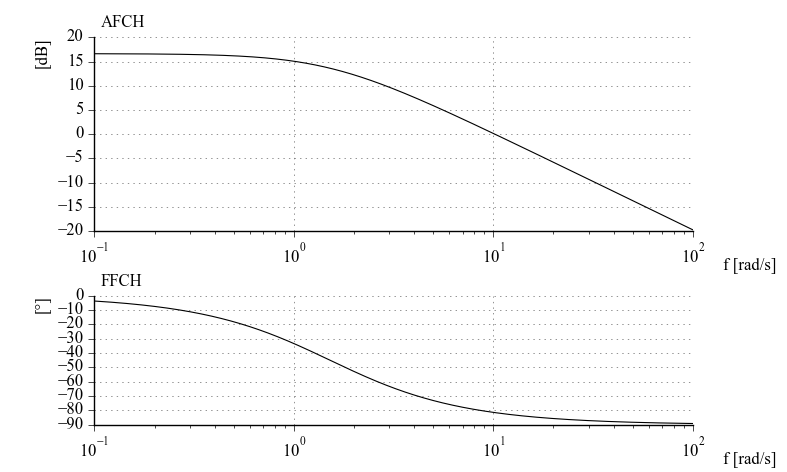

In [10]:
fig = plt.figure(1, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
#------------------
ax0.set_title(u'AFCH', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'[dB]', y=1, ha='right', rotation='vertical')

ax0.semilogx(omega, magdB,
             '-k', lw=0.8,
             )

#------------------
ax1.set_title(u'FFCH', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'[°]', y=1, ha='right', rotation='vertical')

ax1.semilogx(omega, phi*180/np.pi,
             '-k', lw=0.8,
             )

#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u'f [rad/s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.12, 0.4, 0.92, 0.1)

Určme zo získanej frekvenčnej charakteristiky hodnoty udávajúce amplitúdový pomer a fázový posun pre konkrétnu frekvenciu $\omega_m = \frac{1}{T}$ [rad/s].

In [11]:
omega_m = 1/T

Re_m = K/(1 + (omega_m**2 * T**2))
Im_m= -(omega_m*K*T)/(1 + (omega_m**2 * T**2))
modul_m = np.sqrt(Re_m**2 + Im_m**2)
phi_m = np.arctan(Im_m/Re_m)
magdB_m = 20 * np.log10(modul_m)

print u'frekvencia:  {:8.2f} [rad/s]'.format(omega_m)
print u'ampl. pomer: {:8.2f} [dB]'.format(magdB_m)
print u'fáz. posun:  {:8.2f} [°]'.format(phi_m *180/np.pi)

frekvencia:      1.52 [rad/s]
ampl. pomer:    13.63 [dB]
fáz. posun:    -45.00 [°]


Vyznačené v grafe:

<IPython.core.display.Javascript object>


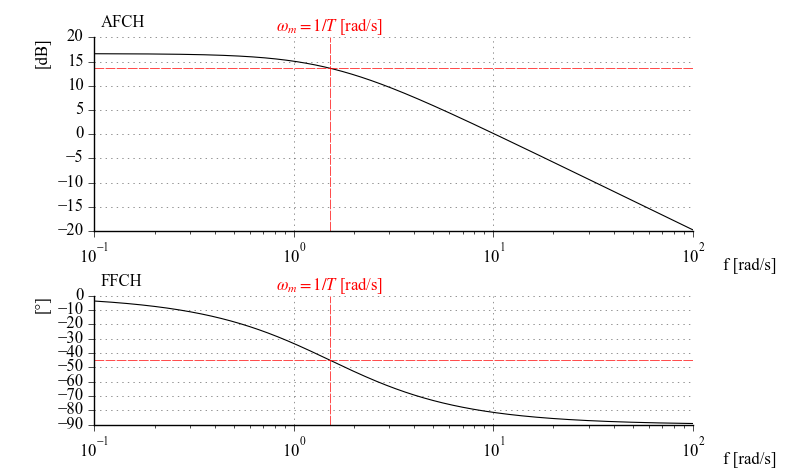

In [12]:
fig = plt.figure(2, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
#------------------
ax0.set_title(u'AFCH', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'[dB]', y=1, ha='right', rotation='vertical')

ax0.semilogx(omega, magdB,
             '-k', lw=0.8,
             )

ax0.semilogx([(1/T), (1/T)], [ax0.get_ylim()[0], ax0.get_ylim()[1]],
             '--r', lw=0.5, dashes=[7,1],
             )

ax0.text((1/T), ax0.get_ylim()[1],
         u'$\omega_m = 1/T$ [rad/s]',
         ha='center', va='bottom', color='r',
        )

ax0.semilogx([ax0.get_xlim()[0], ax0.get_xlim()[1]], [magdB_m, magdB_m],
             '--r', lw=0.5, dashes=[7,1],
             )

#------------------
ax1.set_title(u'FFCH', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'[°]', y=1, ha='right', rotation='vertical')

ax1.semilogx(omega, phi*180/np.pi,
             '-k', lw=0.8,
             )

ax1.semilogx([(1/T), (1/T)], [ax1.get_ylim()[0], ax1.get_ylim()[1]],
             '--r', lw=0.5, dashes=[7,1],
             )

ax1.text((1/T), ax1.get_ylim()[1],
         u'$\omega_m = 1/T$ [rad/s]',
         ha='center', va='bottom', color='r',
        )

ax1.semilogx([ax1.get_xlim()[0], ax1.get_xlim()[1]], [phi_m *180/np.pi, phi_m *180/np.pi],
             '--r', lw=0.5, dashes=[7,1],
             )

#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u'f [rad/s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.12, 0.4, 0.92, 0.1)

#### Meranie jedného bodu frekvenčnej charakteristiky

Všetko vyššie uvedené sa týka vypočítania frekvenčnej charakteristiky pre danú prenosovú funkciu. Úlohou je však odemrať bod (body) frekvenčnej charakteristiky.

Najskôr je systém potrebné priviesť do pracovného bodu. Potom je potrebné na vtup systému priviesť harmonický signál s danou frekvenciou a jednotkovou amplitúdou. Jednotková amplitúda nech má takú istú veľkosť aká bola veľkosť jednotkového skoku použitá v predchádzajúcej práci. Frekvencia, ktorá nás zaujíma je v tomto prípade $\frac{1}{T}$ [rad/s].

Definujme celkový vstupný signál pre zrealizovanie merania, ako obvykle, nasledujúcou tabuľkou:

In [13]:
u_tabulka_DC = np.array([[0, u_PB1]]) # v case 0 sa ma nastavit hodnota u_PB1 (definuje jednosmernu zlozku vst. sig.)


########################################################
########################################################

sinfrq = 1.0/T    #[rad/s]

########################################################
########################################################
# vytvorenie sinusoidy:
sinTimeVect = np.arange(0,50,0.01)
sinAmp = u_PB1_okol
sinValues = sinAmp * np.sin(sinfrq*sinTimeVect)

# posunutie casoveho vektora sinusoidy o cas potrebny pre ustalenie systemu v pracovnom bode:
sinTimeVect[:] = sinTimeVect[:] + 5.0

# posunutie sinusoidy do pracovneho bodu
sinValues[:] = sinValues[:] + u_PB1

# zostavenie definujucej tabulky sinusoidy (definuje striedavu zlozku vst. sig.)
u_tabulka_AC = np.hstack([sinTimeVect.reshape(-1,1), sinValues.reshape(-1,1)])

u_tabulka = np.vstack([u_tabulka_DC, u_tabulka_AC])

print u_tabulka

[[  0.           4.        ]
 [  5.           4.        ]
 [  5.01         4.01212075]
 ..., 
 [ 54.97         4.24701444]
 [ 54.98         4.25851459]
 [ 54.99         4.26995539]]


S pripravenou tabuľkou definujúcou požadovaný priebeh vstupného signálu možno zrealizovať simuláciu (akože meranie):

<IPython.core.display.Javascript object>


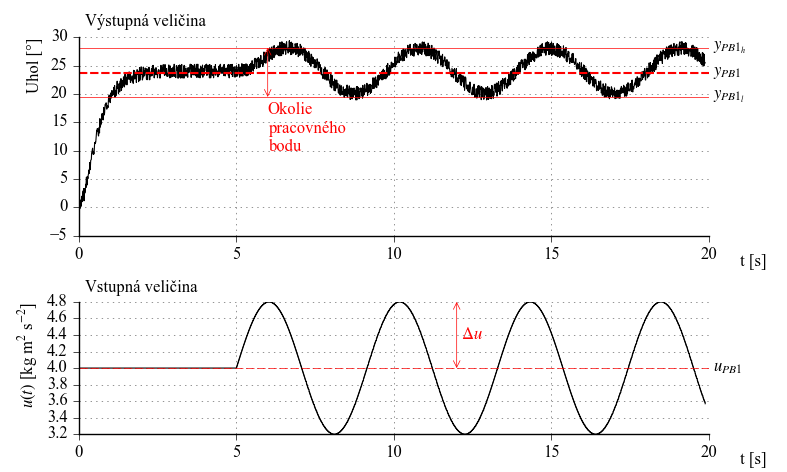

In [14]:
def fcn_rovniceKyvadla(x, t, u):

    x_1, x_2 = x

    m = 1
    l = 1
    g = 9.81
    beta = 2 * 1.0 *np.sqrt(g/l)

    dotx_1 = x_2
    dotx_2 = -(beta/m*l**2) * x_2 - (g/l) * np.sin(x_1) + (1/m*l**2) * u

    return [dotx_1, dotx_2]



def fcn_simSch01(t_start, t_final, T_s, u_tabulka):

    finalIndex = int(((t_final-t_start)/T_s) + 1)

    #-----------------------------------------
    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start

    #-----------------------------------------
    x_0 = np.zeros(2)

    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    #-----------------------------------------
    u = np.zeros(t_log.shape)

    for idx in range(u.shape[0]):
        lastValue = u_tabulka[:,1][u_tabulka[:,0]<=idx*T_s ][-1]
        u[idx] = lastValue

    #-----------------------------------------
    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        odeOut = odeint(fcn_rovniceKyvadla,
                        x_log[idx-1,:],
                        timespan,
                        args=(u[idx-1,:],)
                        )

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]

    # y bude umelo zasumeny vystup
    y = (x_log[:,0].reshape(-1,1)*180/np.pi) + ((np.random.rand(x_log[:,0].shape[0],1)-0.5)*2.5)

    return [t_log, x_log, u, y]



# ---------------------------------------------------------
# ---------------------------------------------------------

t_log, x_log, u, y = fcn_simSch01(0, 19.9, 0.01, u_tabulka)
suroveData = np.hstack([t_log, y])

# ---------------------------------------------------------
# ---------------------------------------------------------



fig = plt.figure(30, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(suroveData[:,0], suroveData[:,1],
         '-k', lw=0.8,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.plot(t_log, u,
         '-k', lw=0.8, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)

#-------------
#Doplnujuce info v obr:

#--------
ax0.plot([ax0.get_xlim()[0], ax0.get_xlim()[1]], [y_PB1, y_PB1],
         '--r', dashes=[6,2], lw=1.5,
         )
ax0.text(ax0.get_xlim()[1], y_PB1,
         u' $y_{PB1}$',
         ha='left', va='center',
        )
ax0.plot([ax0.get_xlim()[0], ax0.get_xlim()[1]], [y_PB1_h, y_PB1_h],
         '-r', lw=0.5,
         )
ax0.text(ax0.get_xlim()[1], y_PB1_h,
         u' $y_{PB1_h}$',
         ha='left', va='center',
        )
ax0.plot([ax0.get_xlim()[0], ax0.get_xlim()[1]], [y_PB1_l, y_PB1_l],
         '-r', lw=0.5,
         )
ax0.text(ax0.get_xlim()[1], y_PB1_l,
         u' $y_{PB1_l}$',
         ha='left', va='center',
        )
ax0.annotate(s='', xy=(6,y_PB1_h), xytext=(6,y_PB1_l), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5,),
            )
ax0.text(6, y_PB1_l*0.95,
         u'Okolie\npracovného\nbodu',
         ha='left', va='top', color='red',
        )

#--------
ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [u_PB1, u_PB1],
         '--r', dashes=[6,2], lw=0.5,
         )
ax1.text(ax1.get_xlim()[1], u_PB1,
         u' $u_{PB1}$',
         ha='left', va='center',
        )

ax1.annotate(s='', xy=(12,u_PB1), xytext=(12,u_PB1 + u_PB1_okol), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5,),
            )
ax1.text(12, u_PB1+0.4,
         u' $\Delta u$',
         ha='left', va='center', color='red',
        )
#---------------------------------------------- 


Pre odčítanie potrebných hodnôt z nameraného je potrebné zamerať sa na čas po skončení prechodového deja. Nech je to čas po 11 sekunde merania...

In [15]:
temp_Mask = np.logical_and((t_log >= 11), (t_log <= 20))

vystrih_t = t_log[temp_Mask]
vystrih_y = y[temp_Mask]
vystrih_u = u[temp_Mask]

<IPython.core.display.Javascript object>


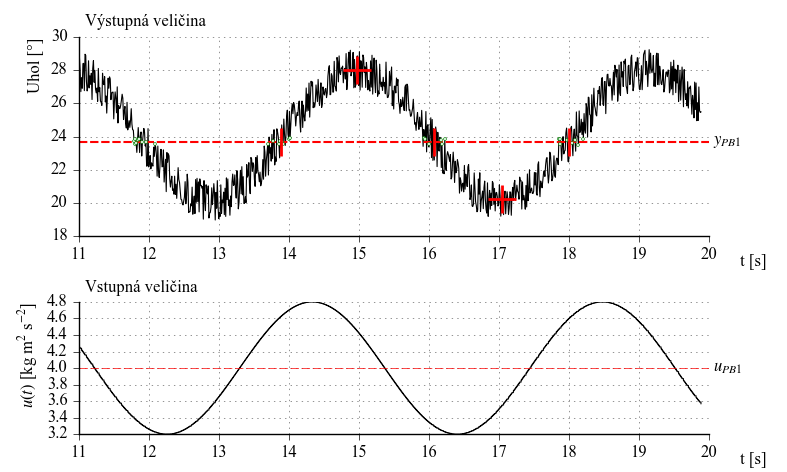

In [16]:
fig = plt.figure(31, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(vystrih_t, vystrih_y,
         '-k', lw=0.8,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.plot(vystrih_t, vystrih_u,
         '-k', lw=0.8,
         drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)

#--------
ax0.plot([ax0.get_xlim()[0], ax0.get_xlim()[1]], [y_PB1, y_PB1],
         '--r', dashes=[6,2], lw=1.5,
         )
ax0.text(ax0.get_xlim()[1], y_PB1,
         u' $y_{PB1}$',
         ha='left', va='center',
        )

ax1.plot([ax1.get_xlim()[0], ax1.get_xlim()[1]], [u_PB1, u_PB1],
         '--r', dashes=[6,2], lw=0.5,
         )
ax1.text(ax1.get_xlim()[1], u_PB1,
         u' $u_{PB1}$',
         ha='left', va='center',
        )

Pre ďalšie odčítavenie z nameraného priebehu výstupného signálu predpokladajme, že hodnota `y_PB1` je dobrým odhadom skutočnej strednej hodnoty výstupného signálu.

Priesečník výstupného signálu s jeho strednou hodnotou, ktorý sa nachádza v časovom intervale 13 až 15 sekúnd určme takto:

In [17]:
temp_pct = 0.01
temp_Mask = np.logical_and( (vystrih_y >= (y_PB1-(y_PB1*temp_pct))), (vystrih_y <= (y_PB1+(y_PB1*temp_pct))))

ax0.plot(vystrih_t[temp_Mask], vystrih_y[temp_Mask],
         'og', ms=2, mec='g', mew=0.5, mfc='w',
         )

temp_Mask_p01 = np.logical_and( (vystrih_t[temp_Mask] >13), (vystrih_t[temp_Mask] <15))

p01_t = np.mean(vystrih_t[temp_Mask][temp_Mask_p01 ])

ax0.plot(p01_t, y_PB1,
         '|', ms=20, mec='r', mew=2.0, mfc='r',
         )
print 'cas 1. priesecnika nulou: {:.2f}'.format(p01_t)

cas 1. priesecnika nulou: 13.88


Priesečník výstupného signálu s jeho strednou hodnotou, ktorý sa nachádza v časovom intervale 15 až 17 sekúnd určme takto:

In [18]:
temp_Mask_p02 = np.logical_and( (vystrih_t[temp_Mask] >15), (vystrih_t[temp_Mask] <17))

p02_t = np.mean(vystrih_t[temp_Mask][temp_Mask_p02 ])

ax0.plot(p02_t, y_PB1,
         '|', ms=20, mec='r', mew=2.0, mfc='r',
         )
print 'cas 2. priesecnika nulou: {:.2f}'.format(p02_t)

cas 2. priesecnika nulou: 16.08


Niekde medzi týmito priesečníkmi hľadajme 1. maximum:

In [19]:
max1_cas = p01_t + ((p02_t - p01_t)/2.0)

print 'cas 1. maxima:     {:.2f}'.format(max1_cas)

temp_pct = 0.01
temp_Mask_max1 = np.logical_and( (vystrih_t >= (max1_cas-(max1_cas*temp_pct))), (vystrih_t <= (max1_cas+(max1_cas*temp_pct))))

max1_hodnota =  np.mean(vystrih_y[temp_Mask_max1])

print 'hodnota 1. maxima: {:.2f}'.format(max1_hodnota)

ax0.plot(max1_cas, max1_hodnota,
         '+', ms=20, mec='r', mew=2.0, mfc='r',
         )


cas 1. maxima:     14.98
hodnota 1. maxima: 28.03


Priesečník výstupného signálu s jeho strednou hodnotou, ktorý sa nachádza v časovom intervale 17 až 19 sekúnd určme rovnako, a tiež 1. minimum...

In [20]:
temp_Mask_p03 = np.logical_and( (vystrih_t[temp_Mask] >17), (vystrih_t[temp_Mask] <19))

p03_t = np.mean(vystrih_t[temp_Mask][temp_Mask_p03 ])

ax0.plot(p03_t, y_PB1,
         '|', ms=20, mec='r', mew=2.0, mfc='r',
         )
print 'cas 3. priesecnika nulou: {:.2f}'.format(p03_t)

cas 3. priesecnika nulou: 18.01


In [21]:
min1_cas = p02_t + ((p03_t - p02_t)/2.0)

print 'cas 1. minima:     {:.2f}'.format(min1_cas)

temp_pct = 0.01
temp_Mask_min1 = np.logical_and( (vystrih_t >= (min1_cas-(min1_cas*temp_pct))), (vystrih_t <= (min1_cas+(min1_cas*temp_pct))))

min1_hodnota =  np.mean(vystrih_y[temp_Mask_min1])

print 'hodnota 1. minima: {:.2f}'.format(min1_hodnota)

ax0.plot(min1_cas, min1_hodnota,
         '+', ms=20, mec='r', mew=2.0, mfc='r',
         )


cas 1. minima:     17.05
hodnota 1. minima: 20.21


Dvojnásobok amplitúdy výstupného signálu je:

In [22]:
amp2 = max1_hodnota - min1_hodnota

amp_pomer = amp2/(2*u_PB1_okol)

amp_pomer_dB = 20 * np.log10(amp_pomer)

print '2x vyst. ampl.:    {:8.2f}'.format(amp2)
print 'amplitudovy pomer: {:8.2f} [jednotky ako zosilnenie K]'.format(amp_pomer)
print 'amplitudovy pomer: {:8.2f} [dB]'.format(amp_pomer_dB)


2x vyst. ampl.:        7.82
amplitudovy pomer:     4.89 [jednotky ako zosilnenie K]
amplitudovy pomer:    13.78 [dB]


Zistený amplitúdový pomer z nameraných dát je prijateľne blízko vypočítanému z prechodovej funkcie (prechodová funckia je tak zrejme dobrým modelom reálneho systému čo sa zosilnenia týka).

Vypočítajme periódu vstupného signálu:

In [23]:
u_perioda = (1/sinfrq) * (2*np.pi)

print 'perioda vst. sig.: {:8.3f} [s]'.format(u_perioda)

perioda vst. sig.:    4.147 [s]


To znamená, že časy maxím vstupného signálu sú nasledovné - totiž vstupný signál obsahuje sínusový priebeh od času 5 (až po koniec simulácie), v začiatku, v čase 5, je sínusová zložka nulová a maximum nastáva po štvrtine po začiatku periódy.

In [24]:
u_maxs_t = np.arange(5, 20, u_perioda) + (u_perioda/4)
print u_maxs_t

[  6.03672558  10.18362788  14.33053018  18.47743248]


Zaujíma nás toto maximum:

In [25]:
vstmax1_cas = u_maxs_t[2]
print vstmax1_cas

14.3305301812


Časový posun medzi prvým maximom výstupného signálu a prvým maximom vstupného signálu je nasledovný, a potom vyjadriť tento posun ako uhol je pri známej perióde (frekvencii) signálov jednoduché.

In [26]:
fazPosun =  vstmax1_cas - max1_cas 

fazPosun_rad = (fazPosun/u_perioda) * (2*np.pi)


print 'fazovy posun: {:8.3f} [s]'.format(fazPosun)
print 'fazovy posun: {:8.3f} [rad]'.format(fazPosun_rad)
print 'fazovy posun: {:8.3f} [stupne]'.format(fazPosun_rad*180/np.pi)

fazovy posun:   -0.652 [s]
fazovy posun:   -0.988 [rad]
fazovy posun:  -56.617 [stupne]


Výsledný nameraný fázový posun považujme za prijateľný...

Namerané hodnoty je možné nakresliť do frekvenčnej charakteristiky prenosovej funkcie (pre porovnanie):

<IPython.core.display.Javascript object>


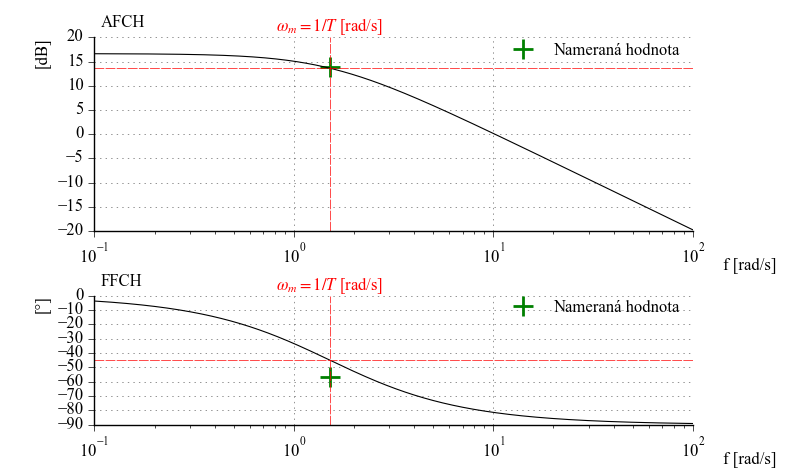

In [27]:
fig = plt.figure(3, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
#------------------
ax0.set_title(u'AFCH', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'[dB]', y=1, ha='right', rotation='vertical')


ax0.semilogx(sinfrq, amp_pomer_dB,
             '+', mec='g', mfc='g', ms=15, mew=2,
             label=u'Nameraná hodnota',
             )

ax0.semilogx(omega, magdB,
             '-k', lw=0.8,
             )

ax0.semilogx([(1/T), (1/T)], [ax0.get_ylim()[0], ax0.get_ylim()[1]],
             '--r', lw=0.5, dashes=[7,1],
             )

ax0.text((1/T), ax0.get_ylim()[1],
         u'$\omega_m = 1/T$ [rad/s]',
         ha='center', va='bottom', color='r',
        )

ax0.semilogx([ax0.get_xlim()[0], ax0.get_xlim()[1]], [magdB_m, magdB_m],
             '--r', lw=0.5, dashes=[7,1],
             )

#------------------
ax1.set_title(u'FFCH', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'[°]', y=1, ha='right', rotation='vertical')

ax1.semilogx(sinfrq, fazPosun_rad*180/np.pi,
             '+', mec='g', mfc='g', ms=15, mew=2,
             label=u'Nameraná hodnota',
             )

ax1.semilogx(omega, phi*180/np.pi,
             '-k', lw=0.8,
             )

ax1.semilogx([(1/T), (1/T)], [ax1.get_ylim()[0], ax1.get_ylim()[1]],
             '--r', lw=0.5, dashes=[7,1],
             )

ax1.text((1/T), ax1.get_ylim()[1],
         u'$\omega_m = 1/T$ [rad/s]',
         ha='center', va='bottom', color='r',
        )

ax1.semilogx([ax1.get_xlim()[0], ax1.get_xlim()[1]], [phi_m *180/np.pi, phi_m *180/np.pi],
             '--r', lw=0.5, dashes=[7,1],
             )

#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u'f [rad/s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.12, 0.4, 0.92, 0.1)

#--------
handles_ax0, labels_ax0 = ax0.get_legend_handles_labels()
ax0.legend(handles_ax0, labels_ax0,
           loc=1, bbox_to_anchor=(0.98, 0.98), ncol=3,
           )
handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
ax1.legend(handles_ax1, labels_ax1,
           loc=1, bbox_to_anchor=(0.98, 0.98), ncol=3,
           )